<a href="https://colab.research.google.com/github/auramolina/Analitica-en-recursos-humanos/blob/main/Modelado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='0C2054'><b>Librerías

In [ ]:
#### Cargar paquetes
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, get_scorer_names, accuracy_score,confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler ## escalar variables

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#metrics
from sklearn.metrics import accuracy_score, classification_report

import joblib  ### para guardar modelos
import openpyxl
import sys
import os

In [ ]:
## Conectar el drive
from google.colab import drive
drive.mount('/content/drive')

path='/content/drive/MyDrive/AA/Analitica-en-recursos-humanos'
os.chdir(path) ### setting a Working directory on drive path
sys.path.append(path+'/')  ###setting path to read user defined functions

Mounted at /content/drive


In [ ]:
import funciones_jc as fn ### importar modulo de  funciones
from funciones_jc import * ### importar toddas llas funciones del archivo

## con esto ya ses pueden utilizar todas las funciones propias

In [ ]:
d2015 = pd.read_csv('https://raw.githubusercontent.com/auramolina/Analitica-en-recursos-humanos/main/Datos/dummies2015')
d2015

,Age,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51,6,2,0,1,131160,1.0,11,0,1.0,...,False,False,False,False,False,False,False,False,True,False
1,31,10,1,0,1,41890,0.0,23,1,6.0,...,False,False,False,False,True,False,False,False,False,True
2,32,17,4,1,4,193280,1.0,15,3,5.0,...,False,False,False,False,False,True,False,False,True,False
3,38,2,5,1,3,83210,3.0,11,3,13.0,...,False,False,False,False,False,False,False,False,True,False
4,32,10,1,1,1,23420,4.0,12,2,9.0,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,5,4,0,1,60290,3.0,17,1,10.0,...,False,False,False,False,True,False,False,False,False,True
4406,29,2,4,1,1,26790,2.0,15,0,10.0,...,True,False,False,False,False,False,False,True,False,False
4407,25,25,2,1,2,37020,0.0,20,0,5.0,...,False,False,False,False,False,True,False,False,True,False
4408,42,18,2,1,1,23980,0.0,14,1,10.0,...,True,False,False,False,False,False,False,True,False,False


#<font color='0C2054'><b> Separación variables

In [ ]:
### Variable respuesta
y = d2015['Attrition']

## Variables explicativas
X1 = d2015.loc[:,~d2015.columns.isin(['Attrition'])]

## <font color='0C2054'>Estandarización

In [ ]:
## Estandarización y escalado de los datos
scaler = StandardScaler()
scaler.fit(X1)
X2 = scaler.transform(X1)
X = pd.DataFrame(X2,columns=X1.columns)

In [ ]:
X2

array([[ 1.54136892, -0.39393818, -0.89168825, ..., -0.53487311,
         1.08823234, -0.68556546],
       [-0.64866811,  0.09963874, -1.86842575, ..., -0.53487311,
        -0.91892141,  1.45864991],
       [-0.53916626,  0.96339837,  1.06178675, ..., -0.53487311,
         1.08823234, -0.68556546],
       ...,
       [-1.30567922,  1.95055222, -0.89168825, ..., -0.53487311,
         1.08823234, -0.68556546],
       [ 0.55585225,  1.0867926 , -0.89168825, ...,  1.86960232,
        -0.91892141, -0.68556546],
       [ 0.33684855,  2.32073492,  0.08504925, ...,  1.86960232,
        -0.91892141, -0.68556546]])

# <font color='0C2054'><b>Modelos Iniciales</font></b>

* Regresión logística: se selecciona LR por su fácil implementación, no requiere ajuste de hiperparametros y, es bueno en problemas de clasificación binaria.
* Bosques aleatorios: se selecciona RFC por su rendimiento, que generalmente es bueno, dando resultados satisfactorios, también porque es bueno en modelos que tienen muchas variables categóricas.

In [ ]:
m_lr = LogisticRegression()
m_rf = RandomForestClassifier()
m_tr = DecisionTreeClassifier()
m_gbt = GradientBoostingClassifier()

In [ ]:
modelos = list([m_lr, m_rf,m_gbt,m_tr])

## <font color='0C2054'>Selección de variables

In [ ]:
var_names = fn.sel_variables(modelos, X, y, threshold = "2*mean")
var_names.shape

(13,)

In [ ]:
X2 = X[var_names] ### matriz con variables seleccionadas
X2.info()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               4410 non-null   float64
 1   BusinessTravel_Travel_Frequently  4410 non-null   float64
 2   DistanceFromHome                  4410 non-null   float64
 3   EnvironmentSatisfaction           4410 non-null   float64
 4   JobSatisfaction                   4410 non-null   float64
 5   MaritalStatus_Single              4410 non-null   float64
 6   MonthlyIncome                     4410 non-null   float64
 7   NumCompaniesWorked                4410 non-null   float64
 8   PercentSalaryHike                 4410 non-null   float64
 9   TotalWorkingYears                 4410 non-null   float64
 10  YearsAtCompany                    4410 non-null   float64
 11  YearsSinceLastPromotion           4410 non-null   float64
 12  YearsW

# <font color='0C2054'><b>Modelado

## <font color='0C2054'>Calculo F1-score

In [ ]:
def medir_modelos(modelos,scoring,X,y,cv):

    metric_modelos=pd.DataFrame()
    for modelo in modelos:
        scores=cross_val_score(modelo,X,y, scoring=scoring, cv=cv )
        pdscores=pd.DataFrame(scores)
        metric_modelos=pd.concat([metric_modelos,pdscores],axis=1)

    metric_modelos.columns=["reg_lineal","decision_tree","random_forest"]
    return metric_modelos

In [ ]:
# Calcular F1-score con 30 iteraciones para todos los modelos con todas las variables
f1score_df = fn.medir_modelos(modelos, "f1", X, y, 30)
# Calcular F1-score con 30 iteraciones para todos los modelos con variables seleccionadas
f1_score_varsel = fn.medir_modelos(modelos, "f1", X2, y, 30)
# visualizar los resultados de f1- score para los modelos con todas las variabels y con las variables seleccionadas
f1=pd.concat([f1score_df,f1_score_varsel],axis=1)
f1.columns=['rl', 'dt', 'rf', 'gb', 'rl_Sel', 'dt_sel', 'rf_sel', 'gb_Sel']
f1

,rl,dt,rf,gb,rl_Sel,dt_sel,rf_sel,gb_Sel
0,0.370370,0.975610,0.625000,0.975610,0.250000,0.975610,0.482759,0.975610
1,0.320000,1.000000,0.580645,1.000000,0.320000,1.000000,0.562500,1.000000
2,0.230769,1.000000,0.482759,0.975610,0.086957,1.000000,0.413793,0.975610
3,0.230769,1.000000,0.645161,1.000000,0.250000,1.000000,0.500000,1.000000
4,0.086957,1.000000,0.173913,1.000000,0.090909,1.000000,0.444444,1.000000
5,0.074074,1.000000,0.600000,1.000000,0.240000,1.000000,0.551724,1.000000
6,0.320000,1.000000,0.687500,1.000000,0.320000,1.000000,0.727273,1.000000
7,0.240000,1.000000,0.600000,1.000000,0.173913,1.000000,0.384615,1.000000
8,0.214286,0.645161,0.370370,0.551724,0.086957,0.645161,0.384615,0.551724
9,0.083333,0.320000,0.090909,0.000000,0.000000,0.384615,0.240000,0.000000


In [ ]:
# promedio de la metrica F1-score para todos los modelos con todas las variables y con las variables seleccionadas
f1.mean()

,0
rl,0.212993
dt,0.838651
rf,0.467928
gb,0.790158
rl_Sel,0.190291
dt_sel,0.836950
rf_sel,0.447682
gb_Sel,0.790158


## <font color='0C2054'>Grilla de hiperparametros para el modelo Ramdon Forest

In [ ]:
param_grid_rf = {
    'n_estimators': [5, 50, 100, 200, 500],  # Número de árboles en el bosque
    'max_features': [5, 20],  # Número de características a considerar en cada división
    'max_depth': [10, 20, 30],  # Profundidad máxima del árbol
    'min_samples_split': [5, 20, 100],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras requeridas para estar en un nodo hoja
    'bootstrap': [True, False]  # Método de muestreo para construir árboles
}

## <font color='0C2054'>Grilla de hiperparámetros para Gradient Boosting

In [ ]:
param_grid_gb = {
    'n_estimators': [100, 200, 500],  # Número de árboles en el ensemble
    'learning_rate': [0.01, 0.1, 0.2, 0.3],  # Tasa de aprendizaje
    'max_depth': [3, 5, 8],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Mínimo número de muestras necesarias para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Mínimo número de muestras necesarias en un nodo hoja
    'subsample': [0.8, 0.9, 1.0],  # Fracción de muestras utilizadas para entrenar cada árbol
    'max_features': ['auto', 'sqrt', 'log2']  # Número de características a considerar al hacer cada división
}

## <font color='0C2054'>Técnica de búsqueda de hiperparámetros para el modelo Ramdon Forest

In [ ]:
tun_rf = RandomizedSearchCV(m_rf,param_distributions=param_grid_rf,n_iter=10,scoring="f1")
tun_rf.fit(X2,y)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30],
                                        'max_features': [5, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [5, 20, 100],
                                        'n_estimators': [5, 50, 100, 200, 500]},
                   scoring='f1')

In [ ]:
# Imprimir los parametros de la grilla con el mejor puntaje
pd.set_option('display.max_colwidth', 100)
resultados=tun_rf.cv_results_
tun_rf.best_params_
pd_resultados=pd.DataFrame(resultados)
pd_resultados[["params","mean_test_score"]].sort_values(by="mean_test_score", ascending=False)

,params,mean_test_score
5,"{'n_estimators': 500, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 5, 'max_de...",0.805765
3,"{'n_estimators': 5, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 20, 'max_dept...",0.748853
2,"{'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 5, 'max_dep...",0.727347
9,"{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 20, 'max_de...",0.724427
8,"{'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 5, 'max_dept...",0.722027
6,"{'n_estimators': 50, 'min_samples_split': 20, 'min_samples_leaf': 1, 'max_features': 5, 'max_dep...",0.621793
0,"{'n_estimators': 100, 'min_samples_split': 100, 'min_samples_leaf': 4, 'max_features': 20, 'max_...",0.375258
1,"{'n_estimators': 500, 'min_samples_split': 100, 'min_samples_leaf': 2, 'max_features': 5, 'max_d...",0.308866
7,"{'n_estimators': 100, 'min_samples_split': 100, 'min_samples_leaf': 1, 'max_features': 5, 'max_d...",0.299202
4,"{'n_estimators': 100, 'min_samples_split': 100, 'min_samples_leaf': 4, 'max_features': 20, 'max_...",0.254877


## <font color='0C2054'>Técnica de búsqueda de hiperparámetros para el GradientBoostingClassifier

In [ ]:
#GRADIENT BOOSTING

from sklearn.ensemble import GradientBoostingClassifier

gboos = GradientBoostingClassifier(n_estimators = 100, random_state = 28)

gboos.fit(X2,y)

GradientBoostingClassifier(random_state=28)

In [ ]:
tun_gbt = RandomizedSearchCV(m_gbt,param_distributions=param_grid_gb,n_iter=10,scoring="f1")
tun_gbt.fit(X2,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_pa

RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 8],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500],
                                        'subsample': [0.8, 0.9, 1.0]},
                   scoring='f1')

In [ ]:
# Imprimir los parametros de la grilla con el mejor puntaje
pd.set_option('display.max_colwidth', 100)
resultados=tun_gbt.cv_results_
tun_gbt.best_params_
pd_resultados=pd.DataFrame(resultados)
pd_resultados[["params","mean_test_score"]].sort_values(by="mean_test_score", ascending=False)

,params,mean_test_score
7,"{'subsample': 0.8, 'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_feat...",0.902292
3,"{'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_feat...",0.893785
2,"{'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_feat...",0.892263
1,"{'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_feat...",0.867157
9,"{'subsample': 0.9, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_feat...",0.793578
6,"{'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_feat...",0.463785
5,"{'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_fea...",0.435981
8,"{'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_feat...",0.378752
4,"{'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_feat...",0.012145
0,"{'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_feat...",NaN


In [ ]:
# Mejor grilla del modelo GradientBoostingClassifier
gb_final = tun_gbt.best_estimator_

# Guardar el modelo con hyperparameter tunning
rf_final = tun_rf.best_estimator_

# <font color='0C2054'><b>Analisis del los modelos

In [ ]:
#####Evaluar métrica de entrenamiento y evaluación para mirar sobre ajuste ####
eval_gb=cross_validate(gb_final,X2,y,cv=30,scoring="f1",return_train_score=True)
eval_rf=cross_validate(rf_final,X2,y,cv=30,scoring="f1",return_train_score=True)

In [ ]:
# ### convertir resultado de evaluacion entrenamiento y evaluacion en data frame
# para Ramdon Forest
train_rf=pd.DataFrame(eval_rf['train_score'])
test_rf=pd.DataFrame(eval_rf['test_score'])
train_test_rf=pd.concat([train_rf, test_rf],axis=1)
train_test_rf.columns=['train_score','test_score']
train_test_rf

,train_score,test_score
0,0.929260,0.950000
1,0.930344,0.975610
2,0.928000,0.900000
3,0.929374,0.975610
4,0.925687,0.950000
5,0.929600,0.950000
6,0.927419,0.975610
7,0.925301,0.864865
8,0.930308,0.727273
9,0.939565,0.173913


In [ ]:
#### convertir resultado de evaluacion entrenamiento y evaluacion en data frame para Ramdon Forest
train_gb=pd.DataFrame(eval_gb['train_score'])
test_gb=pd.DataFrame(eval_gb['test_score'])
train_test_gb=pd.concat([train_gb, test_gb],axis=1)
train_test_gb.columns=['train_score','test_score']
train_test_gb

,train_score,test_score
0,0.953753,0.975610
1,0.953612,1.000000
2,0.953683,1.000000
3,0.953683,1.000000
4,0.953612,1.000000
5,0.953683,1.000000
6,0.953612,1.000000
7,0.953683,1.000000
8,0.953328,0.833333
9,0.953704,0.600000


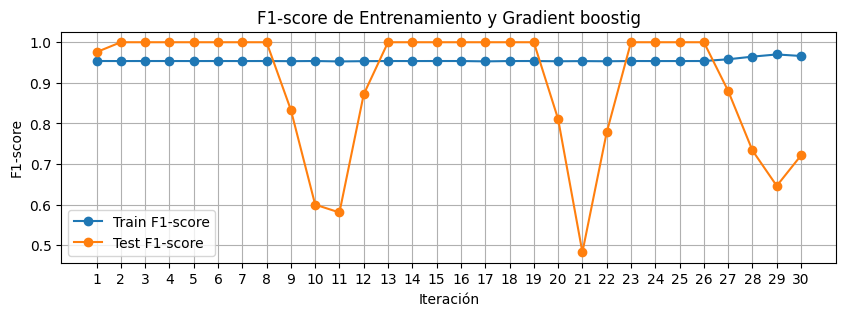

In [ ]:
# Número de iteraciones
iterations = range(1, len(train_test_gb) + 1)

# Crear el gráfico de líneas para ver si hay o no sobreajuste
plt.figure(figsize=(10, 3))
plt.plot(iterations, train_test_gb['train_score'], marker='o', label='Train F1-score')
plt.plot(iterations, train_test_gb['test_score'], marker='o', label='Test F1-score')
plt.title('F1-score de Entrenamiento y Gradient boostig')
plt.xlabel('Iteración')
plt.ylabel('F1-score')
plt.xticks(iterations)
plt.legend()
plt.grid(True)
plt.show()

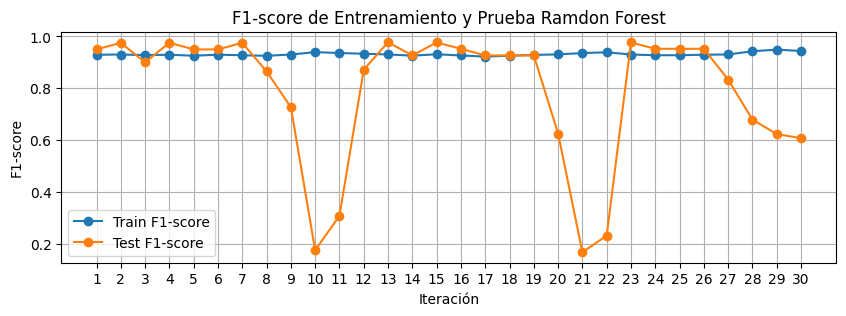

In [ ]:
# Número de iteraciones
iterations = range(1, len(train_test_rf) + 1)

# Crear el gráfico de líneas
plt.figure(figsize=(10, 3))
plt.plot(iterations, train_test_rf['train_score'], marker='o', label='Train F1-score')
plt.plot(iterations, train_test_rf['test_score'], marker='o', label='Test F1-score')
plt.title('F1-score de Entrenamiento y Prueba Ramdon Forest')
plt.xlabel('Iteración')
plt.ylabel('F1-score')
plt.xticks(iterations)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
train_test_gb["test_score"].mean()

0.8971176328897117

In [ ]:
train_test_rf["test_score"].mean()

0.79449694840389

In [ ]:
# separar datos de train y test
x_train,x_test,y_train,y_test = train_test_split(X2,y,shuffle = True,test_size=0.30, random_state=123)

In [ ]:
y_pred_train_gb = gb_final.predict(x_train) # guardar la predicción para train
y_pred_test_gb = gb_final.predict(x_test) # guardar la predicción para

[[1122   25]
 [   0  176]]


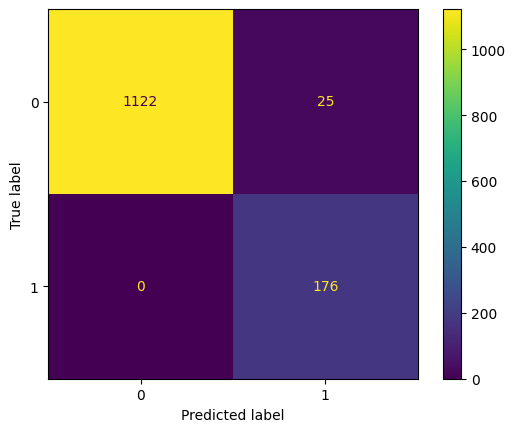

In [ ]:
# Matriz de confusión:
cm = confusion_matrix(y_test, y_pred_test_gb, labels=gb_final.classes_) # guardar las clases para la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gb_final.classes_)
disp.plot();
print(cm)

In [ ]:
TP=cm[0,0]
FP=cm[1,0]
FN=cm[0,1]
TN=cm[1,1]

print(f"Accuracy test: {accuracy_score(y_test, y_pred_test_gb)}")
print(f'Precicion: {TP/(TP+FP)}')
print(f'Recuperacion (Sensibilidad)): {TP/(TP+FN)}')
print(f'F1-score:', f1_score(y_test, y_pred_test_gb, average='binary'))
print(f'Especificidad: {TN/(FP+TN)}')

Accuracy test: 0.981103552532124
Precicion: 1.0
Recuperacion (Sensibilidad)): 0.978204010462075
F1-score: 0.9336870026525199
Especificidad: 1.0


In [ ]:
# Asegúrate de que las columnas del DataFrame coincidan con las del entrenamiento
entrenamiento_columnas = gb_final.feature_names_in_

# Asegurarte de que las columnas de X2 coincidan con las del entrenamiento
for col in entrenamiento_columnas:
    if col not in X2.columns:
        X2[col] = 0  # Agregar la columna faltante con valor 0

# Ordenar las columnas para que coincidan con las del entrenamiento
X2 = X2[entrenamiento_columnas]

##### Mirar importancia de variables para tomar acciones ###
pd.set_option('display.max_rows', 100)

# Obtener la importancia de las variables
importancia1 = pd.DataFrame(entrenamiento_columnas, columns=["variable"])
importancia2 = pd.DataFrame(gb_final.feature_importances_, columns=["peso"])

# Combinar los DataFrames para mostrar la importancia de las variables
importancia = pd.concat([importancia1, importancia2], axis=1)
importancia = importancia.sort_values(by=["peso"], ascending=False)

# Exportar la importancia de las variables a un archivo Excel
importancia.to_excel("/content/drive/MyDrive/AA/Analitica-en-recursos-humanos/salidas/variables_importances.xlsx")

# Hacer una predicción para el índice 0 en X2
prediccion = gb_final.predict(X2[X2.index == 0])
print(prediccion)

[0]


In [ ]:
##### Mirar importancia de variables para tomar acciones ###
pd.set_option('display.max_rows', 100)
importancia1=pd.DataFrame(gb_final.feature_names_in_)
importancia2=pd.DataFrame(gb_final.feature_importances_)
importancia=pd.concat([importancia1,importancia2],axis=1)
importancia.columns=["variable","peso"]
importancia.sort_values('peso')

importancia.sort_values(by=["peso"], ascending=False)
importancia.to_excel("/content/drive/MyDrive/AA/Analitica-en-recursos-humanos/salidas/variables_importances.xlsx")
gb_final.predict(X2[X2.index==0])

array([0])

In [ ]:
### función para exportar y guardar objetos de python (cualquiera)
# joblib.dump(rf_final, "/content/drive/MyDrive/AA/Analitica-en-recursos-humanos/salidas/rf_final.pkl") ## modelo ramdon forest
joblib.dump(gb_final, "/content/drive/MyDrive/AA/Analitica-en-recursos-humanos/salidas/gb_final.pkl") ## modelo gradient boosting
joblib.dump(var_names, "/content/drive/MyDrive/AA/Analitica-en-recursos-humanos/salidas/var_names.pkl")  ### para variables con que se entrena modelo
joblib.dump(scaler, "/content/drive/MyDrive/AA/Analitica-en-recursos-humanos/salidas/scaler.pkl") ##


['/content/drive/MyDrive/AA/Analitica-en-recursos-humanos/salidas/scaler.pkl']